# 혼공머 07-1
> 인공 신경망

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김동준
- categories : ["Python", "혼공머"]

# 주로쓰는 패키지들

In [17]:
#collapse
import numpy as np #넘파이
import pandas as pd #판다스
from plotnine import *  #플롯나인
import matplotlib.pyplot as plt #맷플랏립
import plotly.express as px #플랏리 상호작용 그래프
from IPython.display import HTML #블로그에 html로 올리려고 변환하는 패키지
import seaborn as sns # 씨본, 히스토그램 깔끔하게 그리는 패키지
#___________________________________

from sklearn.neighbors import KNeighborsClassifier # k 최근접이웃
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor  # 결정계수 
from sklearn.metrics import mean_absolute_error # 타깃과 예측의 절댓값 오차 평균을 반환
from sklearn.linear_model import LinearRegression # 선형 회귀
from sklearn.preprocessing import PolynomialFeatures #다중회귀로의 변환기
from sklearn.preprocessing import StandardScaler #규제
from sklearn.linear_model import Ridge #릿지
from sklearn.linear_model import Lasso #라쏘
from sklearn.linear_model import LogisticRegression # 로지스틱회귀
from scipy.special import expit #시그모이드함수
from scipy.special import softmax #소프트맥스함수
from sklearn.linear_model import SGDClassifier # 확률적 경사 하강법
from sklearn.tree import DecisionTreeClassifier # 트리
from sklearn.tree import plot_tree # 트리 모형
from sklearn.model_selection import cross_validate # 교차 검증
from sklearn.model_selection import StratifiedKFold # Kfold 교차 검증
from sklearn.model_selection import GridSearchCV # 그리드 서치 (하이퍼 파라미터 튜닝)
from scipy.stats import uniform, randint #랜덤 서치
from sklearn.model_selection import RandomizedSearchCV # 랜덤 서치 클래스
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트 앙상블
from sklearn.ensemble import ExtraTreesClassifier # 엑스트라 트리 앙상블
from sklearn.ensemble import GradientBoostingClassifier # 그레이디언트 부스팅 앙상블

# 히스토그램 기반 그레이디언트 부스팅
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance # 특성중요도
from xgboost import XGBClassifier # 알고리즘을 구현한 또다른 라이브러리1
from lightgbm import LGBMClassifier # 알고리즘을 구현한 또다른 라이브러리2 , 마이크로소프트에서 구현 


# ____________________
from sklearn.cluster import KMeans # KMeans
from sklearn.decomposition import PCA # 주성분 분석

# 7장 딥러닝
from tensorflow import keras # 케라스 
import tensorflow as tf # 텐서플로

# 패션 MNIST

> 많이 연습하는 데이터셋 ,  손으로 쓴 0~9 까지의 숫자로 구성된 원래 데이터를 숫자대신 패션아이템으로 구성

In [5]:
# MNIST 데이터 다운로드
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


> load_data() 로 훈련데이터와 테스트데이터를 자동으로 분류

In [6]:
# 전달받은 데이터의 크기를 확인
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


> 훈련데이터: 60000개의 이미지와 각 이미지는 28 x 28 크기

> 타깃데이터: 60000개의 원소가 있는 1차원 배열

In [7]:
# 테스트 세트의 크기
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


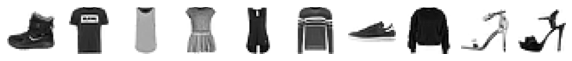

In [8]:
# 몇개의 샘플 사진 출력
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

> 28x28이라서 꽤 작고 흐릿

In [9]:
# 샘플들의 타깃값 출력(처음 10개의 샘플)
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


`-` 샘플들의 의미

|레이블|0|1|2|3|4|5|6|7|8|9|
|-|-|-|-|-|-|-|-|-|-|-|
|패션아이템|티셔츠|바지|스웨터|드레스|코트|샌달|셔츠|스니커즈|가방|앵클 부츠|

In [10]:
# 레이블당 샘플수
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


> 6000개씩 포함

# 로지스틱 회귀로 패션 아이템 분류하기

> 샘플을 하나씩 꺼내서 모델을 훈련하는 방법이 더 효율적 : 경사하강법 이용

> 0~255의 픽셀을 0~1 로 정규화 : 전처리

In [11]:
# 1차원 배열로 바꾸기
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [12]:
# 변환된 크기 확인
print(train_scaled.shape)

(60000, 784)


In [14]:
# 교차 검증으로 성능 확인
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8196000000000001


In [15]:
# max_iter= 를 바꿔도 성능은 그렇게 크게 향상되지 않음
sc = SGDClassifier(loss='log', max_iter=9, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8303666666666667


In [16]:
sc = SGDClassifier(loss='log', max_iter=20, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8436666666666666


# 인공 신경망

> 확률적 경사 하강법을 이용한 로지스틱 회귀 : 가장 기본적인 인공 신경망

> 출력층 , z값(뉴런 = 유닛) , 입력층 

### 케라스 라이브러리

> 직접 GPU 연산을 수행하지 않음

> 대신 GPU 연산을 수행하는 다른 라이브러리를 '백엔드'로 사용

# 인공신경망으로 모델 만들기

In [19]:
# 검증 세트 생성
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [20]:
#훈련세트의 크기 확인
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [21]:
#검증세트의 크기 확인
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


## 인공신경망의 오른쪽에 놓인 층 만들기

> 밀집층 (=완전 연결층)

In [22]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

`-` dense = keras.layers.Dense(뉴런수, 뉴런의 출력에 적용할 함수, 입력의 크기)

`-` 소프트 맥스와 같이 뉴런의 선형 방정식 계산결과에 적용되는 함수 : 활성화 함수

In [23]:
# 신경망 모델 생성
model = keras.Sequential(dense)

# 인공신경망으로 패션 아이템 분류하기

In [24]:
# 케라스 모델 훈련 전 설정 (손실 함수의 종류 설정이 중요)
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [25]:
# MNIST의 타깃값
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [26]:
# 모델 훈련
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 976us/step - loss: 0.6094 - accuracy: 0.7941
Epoch 2/5
1500/1500 [==============================] - 1s 841us/step - loss: 0.4787 - accuracy: 0.8394
Epoch 3/5
1500/1500 [==============================] - 1s 764us/step - loss: 0.4558 - accuracy: 0.8465
Epoch 4/5
1500/1500 [==============================] - 1s 762us/step - loss: 0.4438 - accuracy: 0.8534
Epoch 5/5
1500/1500 [==============================] - 1s 750us/step - loss: 0.4360 - accuracy: 0.8546


> 5번 반복에 정확도가 85%가 됨

In [27]:
# 따로 떼어놓은 검증세트의 모델 성능 확인
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 632us/step - loss: 0.4495 - accuracy: 0.8528


[0.44948506355285645, 0.8528333306312561]

_________

# **마무리**

`*` 키워드로 끝내는 핵심 포인트

`-` **인공 신경망** : 생물학적 뉴런에서 영감을 받아 만든 머신러닝 알고리즘입니다. 이름이 신경망이지만 실제 우리 뇌를 모델링한 것은 아닙니다. 신경망은 기존의 머신러닝 알고리즘으로 다루기 어려웠던 이미지, 음성, 텍스트 분야에서 뛰어난 성능을 발휘하면서 크게 주목받고 있습니다. 인공 신경망 알고리즘을 종종 딥러닝이라고도 부릅니다.

`-` **텐서플로** : 구글이 만든 딥러닝 라이브러리로 매우 인기가 높습니다. CPU와 GPU를 사용해 인공 신경망 모델을 효율적으로 훈련하며 모델 구축과 서비스에 필요한 다양한 도구를 제공합니다. 텐서플로 2.0부터는 신경망 모델을 빠르게 구성할 수 있는 케라스를 핵심 API로 채택하였습니다. 케라스를 사용하면 간단한 모델에서 아주 복잡한 모델까지 손쉽게 만들 수 있습니다.


`-` **밀집층** : 가장 간단한 인공 신경망의 층입니다. 인공 신경망에는 여러 종류의 층이 있습니다. 밀집층에서는 뉴런들이 모두 연결되어 있기 때문에 완전 연결 층이라고도 부릅니다. 특별히 출력층에 밀집층을 사용할 때는 분류하려는 클래스와 동일한 개수의 뉴런을 사용합니다.

`-` **원-핫 인코딩** : 정숫값을 배열에서 해당 정수 위치의 원소만 1이고 나머지는 모두 0으로 변환합니다. 이런 변환이 필요한 이유는 다중 분류에서 출력층에서 만든 확률과 크로스 엔트로피손실을 계산하기 위해서 입니다. 텐서플로에서는 'sparse_categorical_entropy' 손실을 지정하면 이런 변환을 수행할 필요가 없습니다.

## **핵심 패키지**

- TensorFlow

> `1` Dense : 신경망에서 가장 기본 층인 밀집층을 만드는 클래스입니다.

`-`이 층에 첫 번째 매개변수에는 뉴런의 개수를 지정합니다.

`-`activation 매개변수에는 사용할 활성화 함수를 지정합니다. 대표적으로 sigmoid', 'softmax 함수가 있습니다. 아무것도 지정하지 않으면 활성화 함수를 사용하지 않습니다.

`-`케라스의 Sequential 클래스에 맨 처음 추가되는 층에는 input shape 매개변수로 입력의 크기를 지정해야 합니다.

> `2` Sequential : 케라스에서 신경망 모델을 만드는 클래스입니다.

`-`이 클래스의 객체를 생성할 때 신경망 모델에 추가할 층을 지정할 수 있습니다. 추가할 층이 1개 이상일 경우 파이썬 리스트로 전달합니다.

> `3` compile() : 모델 객체를 만든 후 훈련하기 전에 사용할 손실 함수와 측정 지표 등을 지정하는 메서드입니다.

`-`loss 매개변수에 손실 함수를 지정합니다. 이진 분류일 경우 'binary_crossentropy', 다중 분류일 경우 categorical_crossentropy'를 지정합니다. 클래스 레이블이 정수일 경우 'sparse_categorical_crossentropy'로 지정합니다. 회귀 모델일 경우 mean_square_error' 등으로 지정할 수 있습니다.

`-`metrics 매개변수에 훈련 과정에서 측정하고 싶은 지표를 지정할 수 있습니다. 측정 지표가 1개 이상일 경우 리스트로 전달합니다.

> `4` fit() : 모델을 훈련하는 메서드입니다.

`-`첫 번째와 두 번째 매개변수에 입력과 타깃 데이터를 전달합니다.

`-`epochs 매개변수에 전체 데이터에 대해 반복할 에포크 횟수를 지정합니다.

> `5` evaluate() : 모델 성능을 평가하는 메서드입니다.

`-`첫 번째와 두 번째 매개변수에 입력과 타깃 데이터를 전달합니다.

`-`Compile() 메서드에서 loss 매개변수에 지정한 손실 함수의 값과 metrics 매개변수에서 지정한 측정 지표를 출력합니다.